# Drawing wiring diagrams in Graphviz


Catlab can draw wiring diagrams using [Graphviz](https://www.graphviz.org/).
Directed wiring diagrams are drawn using the `dot` program and undirected
wiring diagrams using `neato` and `fdp`. This feature requires that Graphviz
be installed, but does not require any additional Julia packages.

In [1]:
using Catlab.WiringDiagrams, Catlab.Graphics

## Directed wiring diagrams

### Symmetric monoidal category

In [2]:
using Catlab.Theories

A, B = Ob(FreeSymmetricMonoidalCategory, :A, :B)
f = Hom(:f, A, B)
g = Hom(:g, B, A)
h = Hom(:h, otimes(A,B), otimes(A,B));

To start, here are a few very simple examples.

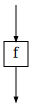

In [3]:
to_graphviz(f)

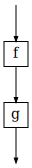

In [4]:
to_graphviz(compose(f,g))

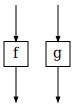

In [5]:
to_graphviz(otimes(f,g))

In the next example, notice how Graphviz automatically "untwists" the double
braiding to minimize edge crossings.

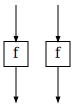

In [6]:
to_graphviz(compose(braid(A,A), otimes(f,f), braid(B,B)))

Here is a larger composite morphism.

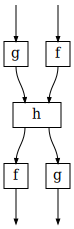

In [7]:
composite = compose(otimes(g,f), h, otimes(f,g))
to_graphviz(composite)

By default, the wiring diagram is laid out from top to bottom. Other layout
orientations can be requested, such as left-to-right or bottom-to-top:

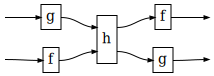

In [8]:
to_graphviz(composite, orientation=LeftToRight)

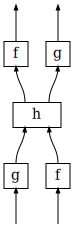

In [9]:
to_graphviz(composite, orientation=BottomToTop)

When working with very large diagrams (larger than the ones shown here), it is
sometimes convenient to omit the ports of the outer box and any wires attached
to them.

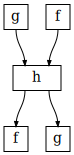

In [10]:
to_graphviz(composite, outer_ports=false)

### Biproduct category

In [11]:
A, B = Ob(FreeBiproductCategory, :A, :B)
f = Hom(:f, A, B)
g = Hom(:g, B, A);

By default, copies and merges are drawn the way they are represented
internally, as multiple wires.

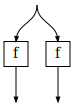

In [12]:
f1 = compose(mcopy(A), otimes(f,f))
to_graphviz(f1)

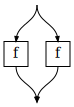

In [13]:
f2 = compose(mcopy(A), otimes(f,f), mmerge(B))
to_graphviz(f2)

To draw nodes for copies and merges, we need to add junctions to the wiring
diagram.

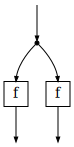

In [14]:
to_graphviz(add_junctions!(to_wiring_diagram(f1)))

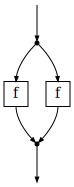

In [15]:
to_graphviz(add_junctions!(to_wiring_diagram(f2)))

### Traced monoidal category

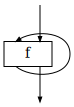

In [16]:
A, B, X, Y = Ob(FreeTracedMonoidalCategory, :A, :B, :X, :Y)
f = Hom(:f, otimes(X,A), otimes(X,B))

to_graphviz(trace(X, A, B, f))

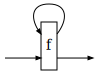

In [17]:
to_graphviz(trace(X, A, B, f), orientation=LeftToRight)

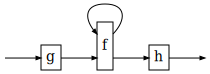

In [18]:
g, h = Hom(:g, A, A), Hom(:h, B, B)

trace_naturality = trace(X, A, B, compose(otimes(id(X),g), f, otimes(id(X),h)))
to_graphviz(trace_naturality, orientation=LeftToRight)

## Undirected wiring diagrams

The composite of two binary relations:

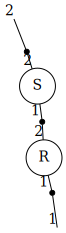

In [19]:
using Catlab.Programs: @relation

diagram = @relation (x,z) where (x,y,z) begin
    R(x,y)
    S(y,z)
end
to_graphviz(diagram, box_labels=:name)

A "wheel"-shaped composition of relations:

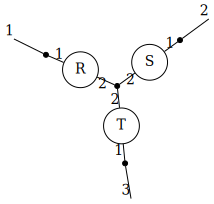

In [20]:
diagram = @relation (x,y,z) where (w,x,y,z) begin
    R(x,w)
    S(y,w)
    T(z,w)
end
to_graphviz(diagram, box_labels=:name)

As these examples show, the `box_labels` keyword argument specifies the data
attribute of boxes to use for box labels, if any. The boolean argument
`port_labels` controls the labeling of ports by numerical values and the
argument `junction_labels` specifies the data attribute of junctions to use
for junction labels. Note that the macro `@relation` creates wiring diagrams
with `name` attribute for boxes and `variable` attribute for junctions.

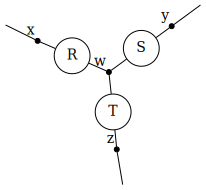

In [21]:
to_graphviz(diagram, box_labels=:name,
            port_labels=false, junction_labels=:variable)

By default, all junctions are shown. The keyword argument `implicit_junctions`
omits any junctions which have exactly two incident ports.

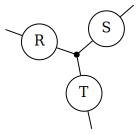

In [22]:
to_graphviz(diagram, box_labels=:name,
            port_labels=false, implicit_junctions=true)

## Custom styles

The visual appearance of wiring diagrams can be customized by setting Graphviz
[attributes](https://www.graphviz.org/doc/info/attrs.html) at the graph, node,
edge, and cell levels. Graph, node, and edge attributes are described in the
Graphviz documentation. Cell attributes are passed to the primary cell of the
[HTML-like label](https://www.graphviz.org/doc/info/shapes.html#html) used for
the boxes.

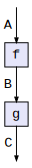

In [23]:
A, B, C = Ob(FreeSymmetricMonoidalCategory, :A, :B, :C)
f, g = Hom(:f, A, B), Hom(:g, B, C)

to_graphviz(compose(f,g),
  labels = true, label_attr=:headlabel,
  node_attrs = Dict(
    :fontname => "Courier",
  ),
  edge_attrs = Dict(
    :fontname => "Courier",
    :labelangle => "25",
    :labeldistance => "2",
  ),
  cell_attrs = Dict(
    :bgcolor => "lavender",
  )
)

## Output formats

The function `to_graphviz` returns an object of a type `Graphviz.Graph`,
representing a Graphviz graph as an abstract syntax tree. When displayed
interactively, this object is automatically run through Graphviz and rendered
as an SVG image. Sometimes it is convenient to perform this process manually,
to change the output format or further customize the generated dot file.

To generate a dot file, use the builtin pretty-printer. This feature does not
require Graphviz to be installed.

In [24]:
using Catlab.Graphics: Graphviz

graph = to_graphviz(compose(f,g))
Graphviz.pprint(graph)

digraph G {
  graph [fontname="Serif",rankdir="TB"];
  node [fontname="Serif",shape="none",width="0",height="0",margin="0"];
  edge [arrowsize="0.5",fontname="Serif"];
  {
    graph [rank="source",rankdir="LR"];
    node [style="invis",shape="none",label="",width="0.333",height="0"];
    edge [style="invis"];
    n1p1 [id="in1"];
    n1p1;
  }
  {
    graph [rank="sink",rankdir="LR"];
    node [style="invis",shape="none",label="",width="0.333",height="0"];
    edge [style="invis"];
    n2p1 [id="out1"];
    n2p1;
  }
  n3 [comment="f",id="n3",label=<<TABLE BORDER="0" CELLPADDING="0" CELLSPACING="0">
<TR><TD><TABLE BORDER="0" CELLPADDING="0" CELLSPACING="0"><TR><TD HEIGHT="0" WIDTH="24" PORT="in1"></TD></TR></TABLE></TD></TR>
<TR><TD BORDER="1" CELLPADDING="4">f</TD></TR>
<TR><TD><TABLE BORDER="0" CELLPADDING="0" CELLSPACING="0"><TR><TD HEIGHT="0" WIDTH="24" PORT="out1"></TD></TR></TABLE></TD></TR>
</TABLE>>];
  n4 [comment="g",id="n4",label=<<TABLE BORDER="0" CELLPADDING="0" CELLSPACIN

Catlab provides a simple wrapper around the Graphviz command-line programs.
For example, here is the JSON output for the graph.

In [25]:
import JSON

JSON.parse(Graphviz.run_graphviz(graph, format="json0"))

Dict{String,Any} with 9 entries:
  "name"          => "G"
  "strict"        => false
  "bb"            => "0,0,24,160"
  "objects"       => Any[Dict{String,Any}("rank"=>"source","name"=>"%3","nodes"…
  "fontname"      => "Serif"
  "rankdir"       => "TB"
  "directed"      => true
  "edges"         => Any[Dict{String,Any}("headport"=>"in1:n","tail"=>2,"head"=…
  "_subgraph_cnt" => 2